# App Reviews Analysis of Philippine Banks

---

This project seeks to analyze the performace of the iOS applications of the top 3 privately owned banks in the Philippines which are Banco De Oro (BDO), Bank of the Philippine Islands (BPI), and Metropolitan Bank & Trust Company (Metrobank) using Natural Language Processing or NLP.

The data is obtained from Apple App Store reviews. This project shows how you can derive insights generated by your users and make decisions based on these insights and data.

## Goal 5: Conduct Sentiment Analysis

---

In this task, we will classify the reviews if it was a positive review, a negative review, or even a neutral review. In the previous task, we applied zero-shot classification to determine which aspect of the app the user is emphasizing in his/her review. That is a complimentary information here in sentiment analysis, 

If the reviews are positive we can see which aspects of the iOS application is doing good. Consequently, if the reviews are negative, we can see which aspects of the iOS application can be improved.

In [1]:
import torch
import matplotlib.pyplot as plt
from datasets import load_dataset

In [2]:
# For a custom dataset: dataset = load_dataset('csv', data_files='path_to_your_file.csv')
# For datasets from Hugging Face Hub: dataset = load_dataset('dataset_name')
dataset = load_dataset('csv', data_files='datasets/df_reviews_wcategories.csv')

Using custom data configuration default-efe8b13ee27887a4


Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

0 tables [00:00, ? tables/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-efe8b13ee27887a4/0.0.0/652c3096f041ee27b04d2232d41f10547a8fecda3e284a79a0ec4053c916ef7a. Subsequent calls will reuse this data.


/usr/local/lib/python3.9/dist-packages/datasets/download/streaming_download_manager.py:695: FutureWarning: the 'mangle_dupe_cols' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'mangle_dupe_cols'
  return pd.read_csv(xopen(filepath_or_buffer, "rb", use_auth_token=use_auth_token), **kwargs)


  0%|          | 0/1 [00:00<?, ?it/s]

In [3]:
from transformers import pipeline

sentiment_classifier = pipeline("sentiment-analysis", 
                                model="distilbert-base-uncased-finetuned-sst-2-english", 
                                device=0 if torch.cuda.is_available() else -1)

In [4]:
# Function for conducting sentiment analysis using the sentiment_classifier pipeline
def classify_sentiment(batch):
    texts = batch["translated_review"]
    results = sentiment_classifier(texts)
    batch["sentiment"] = [result['label'] for result in results]
    batch["sentiment_prob"] = [result['score'] for result in results]
    return batch

# Apply the function
sa_dataset = dataset.map(classify_sentiment, batched=True)

  0%|          | 0/4 [00:00<?, ?ba/s]

In [5]:
# Determine the keys of the dataset, which we will use to convert back to a dataframe
print(list(sa_dataset.keys()))

['train']


In [6]:
# Convert to pandas
df_final = sa_dataset['train'].to_pandas()
df_final.head()

,Unnamed: 0.1,Unnamed: 0,date,review,rating,isEdited,userName,title,developerResponse,bank_app,review_language,review_language_prob,is_translated,translated_text,translated_review,zs_label,zs_prob,sentiment,sentiment_prob
0,0,0,8/21/2023 22:42,I tried this one because of the notification i...,1.0,False,Dence07,Useless app,None,Banco De Oro,eng_Latn,0.999971,no,I tried this one because of the notification i...,I tried this one because of the notification i...,usability,0.372049,NEGATIVE,0.999345
1,1,1,6/29/2023 6:55,I am quite disappointed with the BDO App’s lac...,1.0,False,Domansss,SMH,None,Banco De Oro,eng_Latn,0.999866,no,I am quite disappointed with the BDO App’s lac...,I am quite disappointed with the BDO App’s lac...,functionality,0.799804,NEGATIVE,0.994899
2,2,2,9/18/2023 14:58,I have this app for a almost a month already a...,1.0,False,Je123DJ,Not User Friendly,None,Banco De Oro,eng_Latn,0.999952,no,I have this app for a almost a month already a...,I have this app for a almost a month already a...,functionality,0.607915,NEGATIVE,0.999385
3,3,3,8/18/2023 8:18,What are these apps you keep developing? Do th...,1.0,False,Rieyuxel,Higher a UX Designer!,None,Banco De Oro,eng_Latn,0.999986,no,What are these apps you keep developing? Do th...,What are these apps you keep developing? Do th...,functionality,0.611326,NEGATIVE,0.996966
4,4,4,2/3/2022 8:57,Since i have read the reviews and its not appe...,1.0,False,Abner61,TO MANY BDO APPS but useless.,None,Banco De Oro,eng_Latn,0.999955,no,Since i have read the reviews and its not appe...,Since i have read the reviews and its not appe...,usability,0.274798,NEGATIVE,0.997874


Now the training has been finished, the reviews are now classified based on their sentiment. Just like in the previous notebook, the following code provides a checking onto those sentiments that were generated as well as their probability that was caputred by the model.

In [7]:
df_final['sentiment'].value_counts()

NEGATIVE    3413
POSITIVE     362
Name: sentiment, dtype: int64

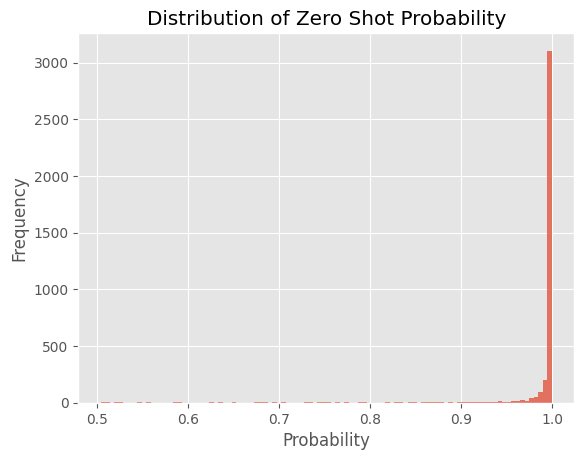

In [8]:
# Set the style of the matplotlib plot
plt.style.use('ggplot')

# Plotting the histogram of the review_language_probability
plt.hist(df_final['sentiment_prob'], bins=100, alpha=0.75)

# Adding titles and labels
plt.title('Distribution of Zero Shot Probability')
plt.xlabel('Probability')
plt.ylabel('Frequency')

# Show the plot
plt.show()

Great almost all of the reviews were classified with superb accuracy.

### Saving the new data

---

Now that we have created the sentiment analysis on to the reviews, let's save the new data now to bring this project to an end.

In [9]:
df_final.set_index('Unnamed: 0')

df_final.index.name = 'index'

In [10]:
df_final.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1).to_csv('datasets/final_output.csv')

---

This project that I have undertaken could very well be a project that is being conducted in a business setting. This was an analysis project involving the use of Machine Learning, particularly NLP. The outcome that I will produce here is a visualization that seeks to explain these findings that I have gathered.

You can look at the visualization [here](https://public.tableau.com/views/TheCultofVisualStudioCode-2/Dashboard1?:language=en-US&:display_count=n&:origin=viz_share_link).